In [22]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
#print(data)

In [24]:
# splitting data into two dataframes by column AB_Cohort
# Разделение данных на два DataFrame по значению столбца "AB_Cohort"
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Сохранение двух DataFrame в файлы CSV
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [25]:
#1 Retention and Churn Rate
# Создаем словарь для хранения Retention и Churn Rate для каждого дня
import pandas as pd

def calculate_retention_churn(data):
    # Создаем словарь для хранения Retention и Churn Rate для каждого дня
    retention_dict = {}
    churn_dict = {}
    total_users = data['User_id'].nunique()

    # Инициализируем значения для дня 0 (установки)
    retention_dict[0] = 100.0  # 100% удержание в день установки
    churn_dict[0] = 0.0  # 0% отток в день установки

    # Проходим по строкам данных и обновляем Retention и Churn Rate
    for day in range(1, 8):  # Начинаем с первого дня, так как день 0 уже инициализирован
        users_on_day = data[data['Retention'] == day]['User_id'].nunique()
        retained_users = data[data['Retention'] >= day]['User_id'].nunique()

        retention_rate = (retained_users / total_users) * 100
        churn_rate = 100 - retention_rate

        retention_dict[day] = retention_rate
        churn_dict[day] = churn_rate

    # Создаем DataFrame из словарей
    retention_churn_df = pd.DataFrame({'Day': list(retention_dict.keys()),
                                       'Retention Rate (%)': list(retention_dict.values()),
                                       'Churn Rate (%)': list(churn_dict.values())})

    return retention_churn_df

result_cohort_A_df = calculate_retention_churn(data_cohort_A)
result_cohort_B_df = calculate_retention_churn(data_cohort_B)

# Вывести результаты
print("result_cohort_A:",result_cohort_A_df)
print("result_cohort_B:",result_cohort_B_df)


result_cohort_A:    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           52.483901       47.516099
2    2           45.860166       54.139834
3    3           41.835327       58.164673
4    4           37.971481       62.028519
5    5           33.578657       66.421343
6    6           28.449862       71.550138
7    7           22.079117       77.920883
result_cohort_B:    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           55.171619       44.828381
2    2           47.385395       52.614605
3    3           42.271366       57.728634
4    4           38.124856       61.875144
5    5           33.471550       66.528450
6    6           28.587883       71.412117
7    7           21.101129       78.898871


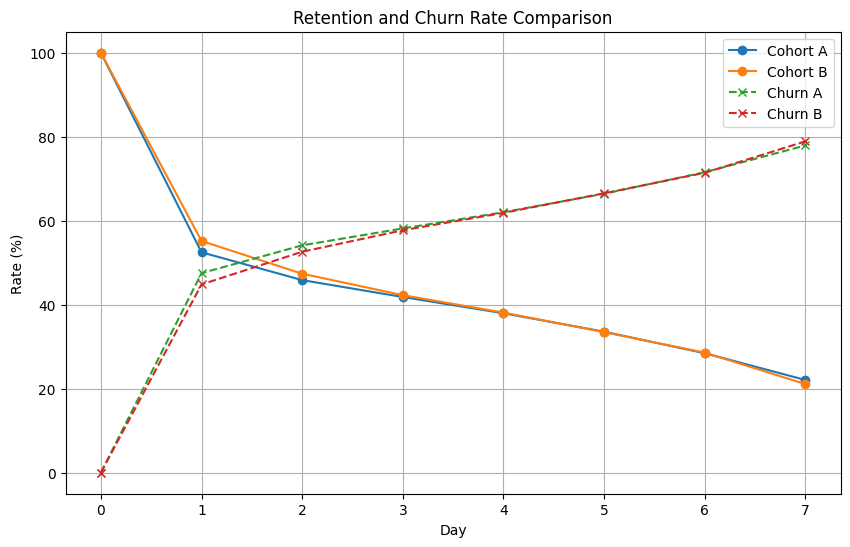

In [26]:
#1.2 Retention and Churn Rate graph

# Строим графики
plt.figure(figsize=(10, 6))

# График Retention Rate для когорты A и B
plt.plot(result_cohort_A_df['Day'], result_cohort_A_df['Retention Rate (%)'], label='Cohort A', marker='o')
plt.plot(result_cohort_B_df['Day'], result_cohort_B_df['Retention Rate (%)'], label='Cohort B', marker='o')

# График Churn Rate для когорты A и B
plt.plot(result_cohort_A_df['Day'], result_cohort_A_df['Churn Rate (%)'], label='Churn A', linestyle='--', marker='x')
plt.plot(result_cohort_B_df['Day'], result_cohort_B_df['Churn Rate (%)'], label='Churn B', linestyle='--', marker='x')

# Настройки графика
plt.title('Retention and Churn Rate Comparison')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

In [27]:
#2.1 Calculate Fuuu factor

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("./data/data.csv", delimiter=";")

# Функция для вычисления FUUU по дням и суммарно
def calculate_fuuu(data):
    fuuu_overall_by_day = []
    fuuu_clean_by_day = []

    fuuu_overall_sum = 0
    fuuu_clean_sum = 0

    for day in range(8):  # Включая день 0 (установки)
        if day == 0:
            continue  # Пропускаем день 0
        day_data = data[data['Retention'] == day]
        count_all_start = day_data['CountAllStart'].sum()
        count_all_finish = day_data['CountAllFinish'].sum()
        count_clean_start = day_data['CountCleanStart'].sum()
        count_clean_finish = day_data['CountCleanFinish'].sum()

        fuuu_overall = count_all_finish / count_all_start if count_all_start > 0 else 0
        fuuu_clean = count_clean_finish / count_clean_start if count_clean_start > 0 else 0

        fuuu_overall_by_day.append(fuuu_overall)
        fuuu_clean_by_day.append(fuuu_clean)

        fuuu_overall_sum += fuuu_overall
        fuuu_clean_sum += fuuu_clean

    return fuuu_overall_by_day, fuuu_clean_by_day, fuuu_overall_sum, fuuu_clean_sum

# Вычисляем FUUU для когорты A по дням и суммарно
fuuu_A_overall_by_day, fuuu_A_clean_by_day, fuuu_A_overall_sum, fuuu_A_clean_sum = calculate_fuuu(data_cohort_A)

# Вычисляем FUUU для когорты B по дням и суммарно
fuuu_B_overall_by_day, fuuu_B_clean_by_day, fuuu_B_overall_sum, fuuu_B_clean_sum = calculate_fuuu(data_cohort_B)

# Вывод результатов
print("FUUU Overall by Day (Cohort A):", fuuu_A_overall_by_day)
print("FUUU Clean by Day (Cohort A):", fuuu_A_clean_by_day)
print("FUUU Overall Sum (Cohort A):", fuuu_A_overall_sum)
print("FUUU Clean Sum (Cohort A):", fuuu_A_clean_sum)

print("FUUU Overall by Day (Cohort B):", fuuu_B_overall_by_day)
print("FUUU Clean by Day (Cohort B):", fuuu_B_clean_by_day)
print("FUUU Overall Sum (Cohort B):", fuuu_B_overall_sum)
print("FUUU Clean Sum (Cohort B):", fuuu_B_clean_sum)





FUUU Overall by Day (Cohort A): [0.3095520513536143, 0.24587643276488677, 0.21601142104107182, 0.19506410256410256, 0.23088483937629156, 0.20397742542327332, 0.18900540717679828]
FUUU Clean by Day (Cohort A): [0.28640739015680794, 0.2267602746745926, 0.19865935405240706, 0.1785586743804014, 0.21757407281849617, 0.19071117561683598, 0.17220381481149816]
FUUU Overall Sum (Cohort A): 1.590371679700039
FUUU Clean Sum (Cohort A): 1.4708747565110394
FUUU Overall by Day (Cohort B): [0.2595903634684798, 0.20123639641960203, 0.1667433058611298, 0.15716643392154372, 0.2049554351997953, 0.15862038779708496, 0.14492462311557788]
FUUU Clean by Day (Cohort B): [0.2387185041614411, 0.1842426355237929, 0.1508119756792119, 0.14435612082670907, 0.1942634817227651, 0.14768873403019744, 0.13274950606076788]
FUUU Overall Sum (Cohort B): 1.2932369457832134
FUUU Clean Sum (Cohort B): 1.1928309580048855


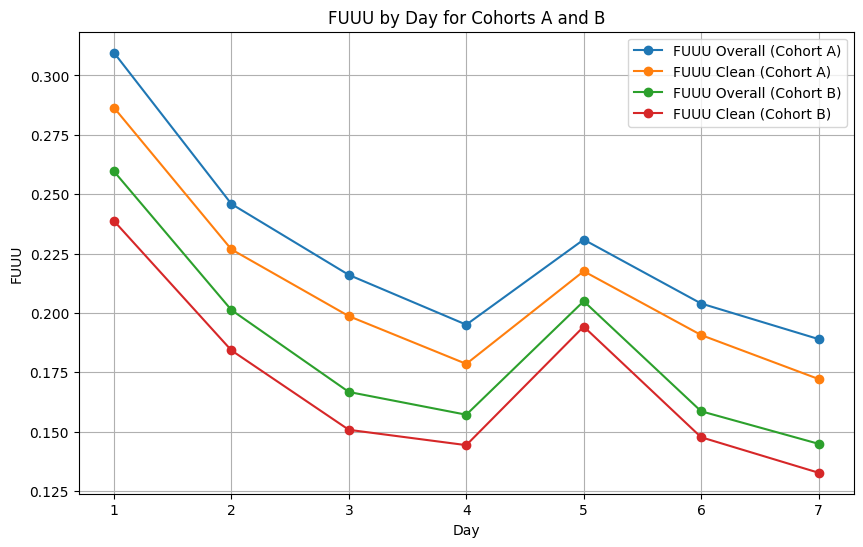

In [28]:
#2.2 Fuuu factor graph
# Строим графики изменения FUUU по дням для когорт A и B
plt.figure(figsize=(10, 6))
days = range(1, 8)

plt.plot(days, fuuu_A_overall_by_day, label='FUUU Overall (Cohort A)', marker='o')
plt.plot(days, fuuu_A_clean_by_day, label='FUUU Clean (Cohort A)', marker='o')
plt.plot(days, fuuu_B_overall_by_day, label='FUUU Overall (Cohort B)', marker='o')
plt.plot(days, fuuu_B_clean_by_day, label='FUUU Clean (Cohort B)', marker='o')

plt.title('FUUU by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('FUUU')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

In [31]:
# 3.1 AVG MaxLevelPassed
# Функция для вычисления среднего максимального уровня по дням и суммарно
def calculate_avg_max_level(data):
    avg_max_level_by_day = []
    avg_max_level_sum = 0

    for day in range(8):  # Включая день 0 (установки)
        if day == 0:
            continue  # Пропускаем день 0
        day_data = data[data['Retention'] == day]
        avg_max_level = day_data['MaxLevelPassed'].mean()

        avg_max_level_by_day.append(avg_max_level)
        avg_max_level_sum += avg_max_level

    return avg_max_level_by_day, avg_max_level_sum

# Вычисляем средний максимальный уровень для когорты A по дням и суммарно
avg_max_level_A_by_day, avg_max_level_A_sum = calculate_avg_max_level(data_cohort_A)

# Вычисляем средний максимальный уровень для когорты B по дням и суммарно
avg_max_level_B_by_day, avg_max_level_B_sum = calculate_avg_max_level(data_cohort_B)

# Вывод результатов
print("Average Max Level by Day (Cohort A):", avg_max_level_A_by_day)
print("Average Max Level Sum (Cohort A):", avg_max_level_A_sum)

print("Average Max Level by Day (Cohort B):", avg_max_level_B_by_day)
print("Average Max Level Sum (Cohort B):", avg_max_level_B_sum)




Average Max Level by Day (Cohort A): [34.509981851179674, 40.442622950819676, 43.44946589975349, 45.55247181266262, 47.751633986928105, 50.48300720906282, 51.225]
Average Max Level Sum (Cohort A): 313.4141837104064
Average Max Level by Day (Cohort B): [37.99541021227768, 44.20245842371656, 49.14496314496314, 53.289256198347104, 54.6534749034749, 57.67406659939455, 61.22816593886463]
Average Max Level Sum (Cohort B): 358.1877954210386


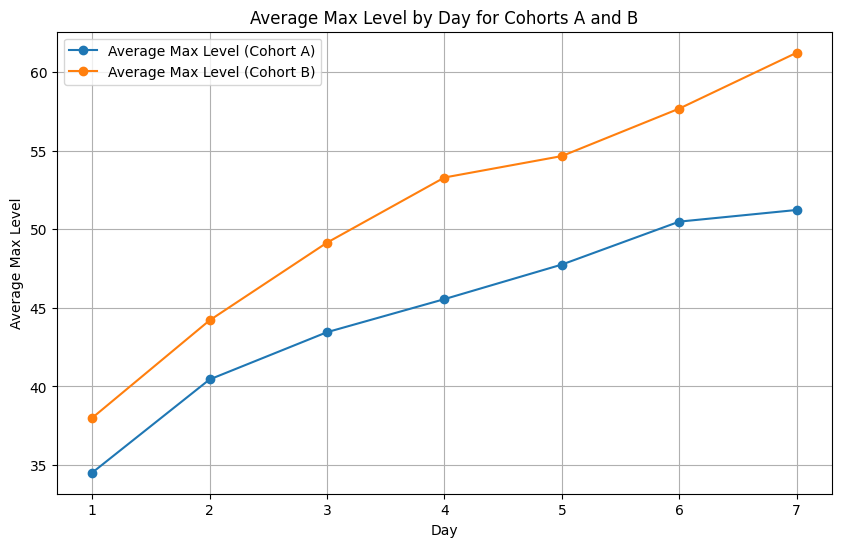

In [30]:
# 3.2 AVG MaxLevelPassed by day graph
# Строим графики изменения среднего максимального уровня по дням для когорт A и B
plt.figure(figsize=(10, 6))
days = range(1, 8)

plt.plot(days, avg_max_level_A_by_day, label='Average Max Level (Cohort A)', marker='o')
plt.plot(days, avg_max_level_B_by_day, label='Average Max Level (Cohort B)', marker='o')

plt.title('Average Max Level by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('Average Max Level')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

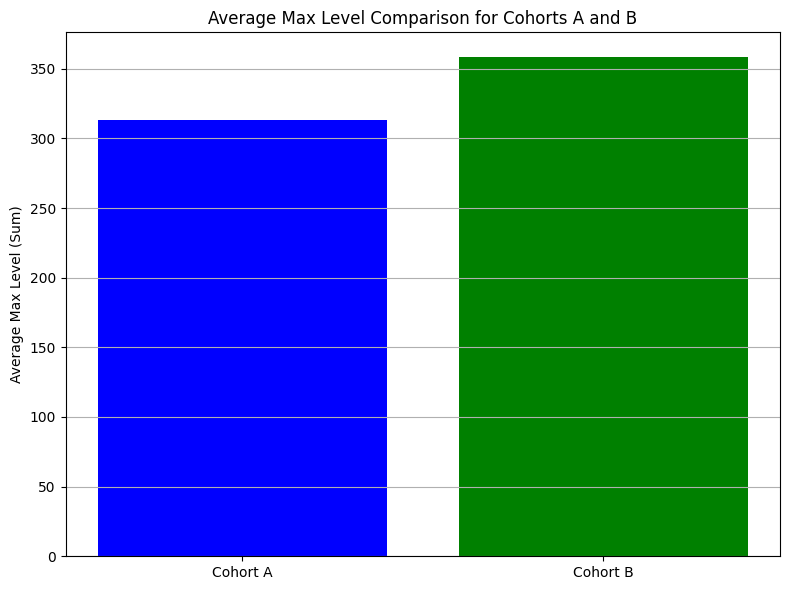

In [34]:
# 3.2 AVG MaxLevelPassed sum graph
# Строим гистограмму сравнения суммарных результатов для когорт A и B
plt.figure(figsize=(8, 6))

cohort_labels = ['Cohort A', 'Cohort B']
avg_max_levels = [avg_max_level_A_sum, avg_max_level_B_sum]

plt.bar(cohort_labels, avg_max_levels, color=['blue', 'green'])
plt.title('Average Max Level Comparison for Cohorts A and B')
plt.ylabel('Average Max Level (Sum)')
plt.grid(axis='y')

# Отображение графика и гистограммы
plt.tight_layout()
plt.show()